In [1]:
import pandas as pd
import numpy as np
FOCAL_LENGTH = 539.1304347826087


In [2]:
showfun = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_qr_task5.csv'
dataset1 = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/part2_presavedData/dataset1/data/task5/camera_localization_task5.csv'
#open csv without header
QR_Data = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/part2_presavedData/dataset1/data/qr_code_position_in_global_coordinate.csv'
df = pd.read_csv(dataset1, names = ['timestamp','barcodeData','c_x','c_y','w','h','perceived_distance','perceived_direction'])
df

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction
0,1.635511e+09,9,-128,91,72,71,87.323944,-13.355844
1,1.635511e+09,8,-200,91,73,71,87.323944,-20.353229
2,1.635511e+09,15,167,91,75,73,84.931507,17.210789
3,1.635511e+09,2,18,90,70,70,88.571429,1.912229
4,1.635511e+09,3,-54,90,70,70,88.571429,-5.719743
...,...,...,...,...,...,...,...,...
1147,1.635511e+09,2,18,90,70,71,87.323944,1.912229
1148,1.635511e+09,15,167,91,75,73,84.931507,17.210789
1149,1.635511e+09,1,91,90,72,73,84.931507,9.580669
1150,1.635511e+09,3,-54,90,70,70,88.571429,-5.719743


In [3]:
qr = pd.read_csv(QR_Data, skiprows=1,names = ['barcodeData','s_x','s_y','pos'])
qr

,barcodeData,s_x,s_y,pos
0,19,0.0,11.0,1
1,20,0.0,22.5,1
2,21,0.0,35.0,1
3,25,0.0,47.0,1
4,26,0.0,59.5,1
5,27,0.0,71.0,1
6,31,0.0,84.0,1
7,32,0.0,96.0,1
8,33,0.0,108.0,1
9,13,13.0,121.5,2


Add true position of the qrcode in df

In [4]:
df = df.merge(qr, on='barcodeData', how='left')
df

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction,s_x,s_y,pos
0,1.635511e+09,9,-128,91,72,71,87.323944,-13.355844,86.5,121.5,2
1,1.635511e+09,8,-200,91,73,71,87.323944,-20.353229,98.0,121.5,2
2,1.635511e+09,15,167,91,75,73,84.931507,17.210789,37.0,121.5,2
3,1.635511e+09,2,18,90,70,70,88.571429,1.912229,62.5,121.5,2
4,1.635511e+09,3,-54,90,70,70,88.571429,-5.719743,74.5,121.5,2
...,...,...,...,...,...,...,...,...,...,...,...
1147,1.635511e+09,2,18,90,70,71,87.323944,1.912229,62.5,121.5,2
1148,1.635511e+09,15,167,91,75,73,84.931507,17.210789,37.0,121.5,2
1149,1.635511e+09,1,91,90,72,73,84.931507,9.580669,50.5,121.5,2
1150,1.635511e+09,3,-54,90,70,70,88.571429,-5.719743,74.5,121.5,2


In [5]:
#dispplay all columsn with barcodeData = 32
df[df['barcodeData'] == 32]

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction,s_x,s_y,pos


In [6]:
# fix the distance measurement
QR_width = 11.5
df['perceived_distance'] = (QR_width * FOCAL_LENGTH) / df['h']
df['perceived_direction'] = np.arctan2(df['c_x'], FOCAL_LENGTH) * 180 / np.pi


In [7]:
df[df['barcodeData'] == 21]

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction,s_x,s_y,pos


In [8]:
#list the number of unique Barcodes
df['barcodeData'].unique()

array([ 9,  8, 15,  2,  3,  7, 14,  1])

In [9]:
def partialDerivative(s_x,s_y,p_x,p_y,psi):
    d_x  = (p_x - s_x) / np.sqrt((s_x - p_x)**2 + (s_y - p_y)**2)
    d_y  = (p_y - s_y) / np.sqrt((s_x - p_x)**2 + (s_y - p_y)**2)
    d_phi = 0

    dphi_x = -1*(p_y - s_y) / ((s_x - p_x)**2 + (s_y - p_y)**2)
    dphi_y = -1*(s_x - p_x) / ((s_x - p_x)**2 + (s_y - p_y)**2)
    dphi_phi = -1

    #return as 2d array
    # return np.array([[d_x,d_y,d_phi],[dphi_x,dphi_y,dphi_phi]])
    return d_x,d_y,d_phi,dphi_x,dphi_y,dphi_phi

def getFunction(s_x,s_y,p_x,p_y,psi):
    d = np.sqrt((s_x - p_x)**2 + (s_y - p_y)**2)
    phi = np.arctan2(s_y-p_y,s_x-p_x) - psi
    #return as 2d array
    return d,phi

In [10]:
#initialise px,py,phi from prior knowledge
p_x = 121 - 38
p_y = 81
psi = 180
pxList = []
pyList = []
psiList = []


# for every timestamp iterate over the number of BarcodeData
for timestamp in df['timestamp'].unique():
  #for each timestamp iterate over the number of BarcodeData
  
  #Jacobian matrix
  J = []
  #function matrix
  F = []
  #Default R values for each barcode
  R = np.eye(2*len(df[df['timestamp'] == timestamp]['barcodeData'].unique()))
  # Y vector
  Y = []
  
  for barcodeData in df[df['timestamp'] == timestamp]['barcodeData'].unique():
  #   print(timestamp, barcodeData)
    #form jacobian matrix
    # J = np.zeros((2,3))
    #default R values
    # r = np.eye(3)
    #get the current row
    row = df[(df['timestamp'] == timestamp) & (df['barcodeData'] == barcodeData)]
  
    s_x = row['s_x'].values[0]
    s_y = row['s_y'].values[0]
    
    # p_x = row['c_x'].values[0]
    # p_y = row['c_y'].values[0]
    y_d = row['perceived_distance'].values[0]
    y_phi= row['perceived_direction'].values[0]
    
    # j = partialDerivative(s_x,s_y,p_x,p_y,theta)
    d_x,d_y,d_phi,dphi_x,dphi_y,dphi_phi = partialDerivative(s_x,s_y,p_x,p_y,psi)
    #get function
    d,phi = getFunction(s_x,s_y,p_x,p_y,psi)
    #append to jacobian matrix
    J.append([d_x,d_y,d_phi])
    J.append([dphi_x,dphi_y,dphi_phi])
    #append to function matrix
    F.append([d])
    F.append([phi])
    #append to Y vector
    Y.append([y_d])
    Y.append([y_phi])
  #convert to numpy array
  J = np.array(J)
  #convert to numpy array
  F = np.array(F)
  #convert to numpy array
  Y = np.array(Y)


  
  # # # inverse of jacobian
  # J_inv = np.linalg.inv(J)
  #inverse of R
  R_inv = np.linalg.inv(R)
  #First term
  first_term = J.T @ R_inv @ J
  first_term = np.linalg.inv(first_term)
  #second term
  second_term = J.T @ R_inv 
  #third term
  third_term = (Y - F)
  delta_X = first_term @ second_term @ third_term
  #update the values
  p_x = p_x + delta_X[0][0]
  p_y = p_y + delta_X[1][0]
  psi = psi + delta_X[2][0]
  #append to list
  pxList.append(p_x)
  pyList.append(p_y)
  psiList.append(psi)
print(p_x,p_y,psi)




     
      



      
      

      

68.58434761169612 37.776793949766194 6.879435637895401


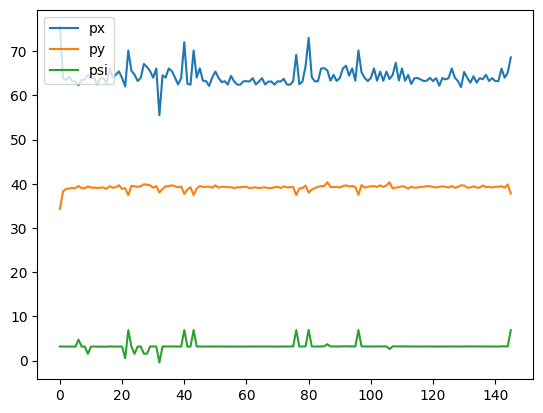

In [11]:
# plot the data
import matplotlib.pyplot as plt
# plot the pxlist,pylist,psilist against time
plt.plot(pxList,label='px')
plt.plot(pyList,label='py')
plt.plot(psiList,label='psi')
plt.legend()
plt.show()




## Task 6

In [12]:
#import motor data
showfun_motor = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_loc_task7_motor.csv'
dataset1_motor = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/part2_presavedData/dataset1/data/task6-task7/motor_control_tracking_task6.csv'

df_motor = pd.read_csv(dataset1_motor, names = ['timestamp','input_1','input2'])
df_motor

,timestamp,input_1,input2
0,1.635511e+09,0.30,0.144
1,1.635511e+09,0.18,0.300
2,1.635511e+09,0.30,0.180
3,1.635511e+09,0.30,0.300
4,1.635511e+09,0.18,0.300
...,...,...,...
440,1.635512e+09,0.30,0.300
441,1.635512e+09,0.18,0.300
442,1.635512e+09,0.30,0.180
443,1.635512e+09,0.18,0.300


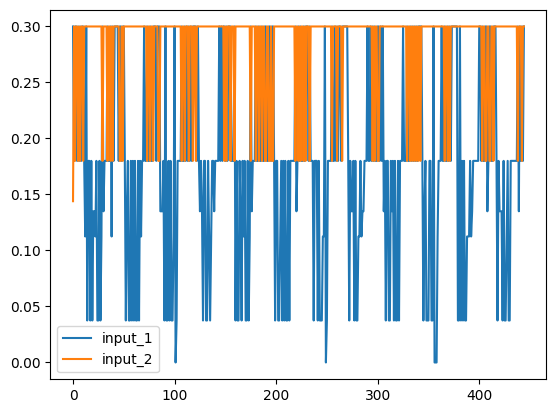

In [13]:
#plot the motor data
plt.plot(df_motor['input_1'],label='input_1')
plt.plot(df_motor['input2'],label='input_2')
plt.legend()

In [14]:
#import IMU data
names = ['timestamp','acc_x','acc_y','acc_z','roll','pitch','gyro_x','gyro_y','gyro_z','mag_x','mag_y','mag_z']
showfun_imu = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_loc_task7_imu.csv'
dataset1_imu = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/part2_presavedData/dataset1/data/task6-task7/imu_tracking_task6.csv'
df_imu = pd.read_csv(dataset1_imu, names = names)
df_imu

,timestamp,acc_x,acc_y,acc_z,roll,pitch,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,1.635511e+09,-0.005002,-0.019520,1.024068,0.123150,0.123328,-0.254993,0.539717,0.199238,0.263519,-1.759573,0.046185
1,1.635511e+09,-0.006222,-0.020130,1.024800,0.062937,0.109054,-0.219993,0.644718,0.059237,0.263519,-1.759573,0.046185
2,1.635511e+09,-0.004758,-0.016836,1.023946,0.114720,-0.021997,-0.044992,0.294718,0.059237,0.251535,-1.755919,0.041070
3,1.635511e+09,-0.005124,-0.019398,1.024556,-0.029951,0.080719,0.025007,0.154718,-0.115763,0.257527,-1.759573,0.045601
4,1.635511e+09,-0.006344,-0.018788,1.022726,0.043263,0.074554,-0.184993,0.539717,-0.080763,0.257527,-1.759573,0.045601
...,...,...,...,...,...,...,...,...,...,...,...,...
4292,1.635512e+09,-0.007320,-0.022570,1.025288,-0.206384,-0.328523,-1.374993,1.274717,2.684238,0.210319,-1.712803,0.043701
4293,1.635512e+09,-0.010980,-0.018544,1.049566,0.042472,-0.234356,-0.604993,0.154718,1.144238,0.210319,-1.712803,0.043701
4294,1.635512e+09,0.005124,-0.036234,1.057252,-0.908176,-0.135651,-0.814993,0.154718,0.479237,0.227273,-1.732534,0.020608
4295,1.635512e+09,0.002074,0.006222,1.044686,1.409303,-0.501737,1.180008,0.469718,-1.270763,0.234142,-1.760158,0.049985


In [15]:
# angle from magnetometer in radians

# df_imu['angle'] = np.arctan2(df_imu['mag_y']*0.48828125,df_imu['mag_x']*0.48828125)* 180 / np.pi    #TODO Check if this is correct
# df_imu



## Calculing 100% velocity from previous task
velocity cm/s = 6.8
The velocity is calculated from the previous task, where the robot was moving at 30% PWM. To get 100% PWM, we need to multiply the velocity by 100/30 = 3.33. This gives us a velocity of 22.6 cm/s.

In [16]:
FULL_VELOCITY = 22.6
FULL_VELOCITY = 20

In [17]:
#calculate the velocity from the motor data by averaging the velocity of the two wheels
df_motor['velocity'] = (df_motor['input_1']*FULL_VELOCITY + df_motor['input2']*FULL_VELOCITY) / 2
df_motor

,timestamp,input_1,input2,velocity
0,1.635511e+09,0.30,0.144,4.44
1,1.635511e+09,0.18,0.300,4.80
2,1.635511e+09,0.30,0.180,4.80
3,1.635511e+09,0.30,0.300,6.00
4,1.635511e+09,0.18,0.300,4.80
...,...,...,...,...
440,1.635512e+09,0.30,0.300,6.00
441,1.635512e+09,0.18,0.300,4.80
442,1.635512e+09,0.30,0.180,4.80
443,1.635512e+09,0.18,0.300,4.80


In [18]:
#convert timestamp to pandas datetime
# df_imu['timestamp'] = pd.to_datetime(df_imu['timestamp'], unit='ms')
# df_motor['timestamp'] = pd.to_datetime(df_motor['timestamp'], unit='ms')

In [19]:
# merge the motor and imu data by using the timestamp and synchronizing them
df_imu_motor = pd.merge_asof(df_motor,df_imu, on='timestamp', direction='backward')  #TODO Check if this is correct
df_imu_motor



,timestamp,input_1,input2,velocity,acc_x,acc_y,acc_z,roll,pitch,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,1.635511e+09,0.30,0.144,4.44,-0.004758,-0.021594,1.034804,-0.140766,-0.530752,1.180008,0.119718,-6.940762,0.256504,-1.710319,0.073955
1,1.635511e+09,0.18,0.300,4.80,0.002318,-0.015494,1.027484,0.777240,-0.416198,-0.114992,0.154718,7.129238,0.233557,-1.710319,0.035808
2,1.635511e+09,0.30,0.180,4.80,0.001098,-0.033672,1.022360,-0.831317,-1.449163,-0.919992,1.099717,-6.520763,0.257819,-1.747588,0.070740
3,1.635511e+09,0.30,0.300,6.00,-0.007198,-0.027572,1.046516,-0.508571,0.120432,-0.744992,1.134718,-0.360762,0.241888,-1.738381,0.042970
4,1.635511e+09,0.18,0.300,4.80,-0.005978,-0.008174,1.014308,0.592966,-0.494364,0.235008,-0.580283,5.554238,0.213534,-1.737358,0.022070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1.635512e+09,0.30,0.300,6.00,0.015006,-0.015250,1.037244,0.185569,-1.142834,-0.289992,0.609718,-0.080763,0.231219,-1.725665,0.048524
441,1.635512e+09,0.18,0.300,4.80,0.005246,-0.008052,1.022604,0.603559,-0.752422,0.200008,0.994718,5.624237,0.262058,-1.718065,0.050424
442,1.635512e+09,0.30,0.180,4.80,0.025132,-0.047946,1.001864,-1.684839,-1.242306,-2.319993,-0.405282,-5.785762,0.247004,-1.748904,0.075563
443,1.635512e+09,0.18,0.300,4.80,0.002440,-0.014030,1.007598,0.271353,-0.423854,-0.219993,0.504718,4.294238,0.207249,-1.716896,0.055978


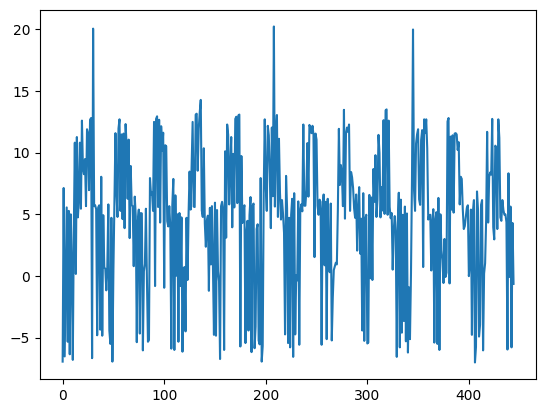

In [20]:
#plot gyro_z
plt.plot(df_imu_motor['gyro_z'])
plt.show()

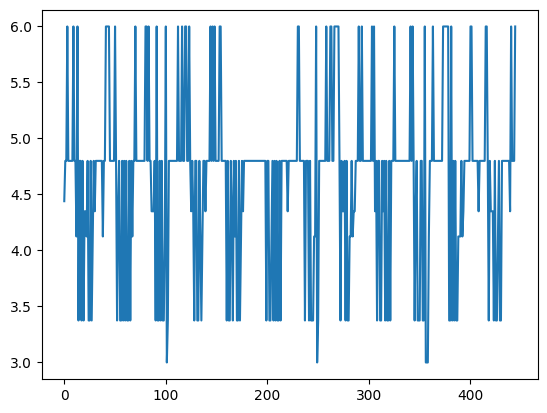

In [21]:
#plot velocity
plt.plot(df_imu_motor['velocity'])

\begin{align}
\dot{p}^x(t) &= v(t) \cos( \phi(t)), \\
\dot{p}^y(t) &= v(t) sin(\phi(t)), \\
\dot{\phi}(t) &= \omega_{gyro}(t),
\end{align}

In [22]:
#Imlimenting dead reckoning using Euler method
#initialise the values
INITIAL_X = 60
INITIAL_Y = 16
INITIAL_PSI = 0

#initialise the lists
p_x = []
p_y = []
p_psi = []

INITIIAL_DT = 0.5024
dt = 0.5024
psi = INITIAL_PSI
px = INITIAL_X
py = INITIAL_Y

# iterate over all timestamps
for index,row in df_imu_motor.iterrows():
  #calculate the change in time
  # if index == 0:
  #   dt = INITIIAL_DT  # set a default value for the first timestep
  # else:
  #   dt = row['timestamp'] - df_imu_motor.iloc[index-1]['timestamp']
  #calculate the change in position
  dp_x = row['velocity'] * np.cos(psi) * dt
  dp_y = row['velocity'] * np.sin(psi) * dt
  # print(dp_x,dp_y)
  print(px,py,psi)
  dpsi = np.deg2rad(row['gyro_z']) * dt

  #calculate the new position
  px = px + dp_x
  py = py + dp_y
  psi = psi + dpsi
  #append to list
  p_x.append(px)
  p_y.append(py)
  p_psi.append(psi)
  


  # #calculate the new position
  # p_x.append(INITIAL_X + dp_x)
  # p_y.append(INITIAL_Y + dp_y)
  # psi.append(INITIAL_PSI + dpsi)
  # #update the initial values
  # INITIAL_X = INITIAL_X + dp_x
  # INITIAL_Y = INITIAL_Y + dp_y
  # INITIAL_PSI = INITIAL_PSI + dpsi




60 16 0
62.230655999999996 16.0 -0.06086031309171394
64.63771127019707 15.853324723908695 0.0016526494761866378
67.04922797696547 15.857310119359322 -0.055524879267479114
70.05898245465184 15.690021912820923 -0.05868823757310468
72.46635063623948 15.54857528444323 -0.009985716310384835
74.87775040544658 15.524494930044604 -0.05672868940124737
77.28539113639924 15.387765924132506 -0.01048135770389299
79.69677867419372 15.362490383198695 -0.06612439296920533
82.10302848726734 15.203146266635809 -0.02233225083721642
85.11667683351438 15.135833525178509 -0.014140357403026715
87.52795574617222 15.101734906855263 -0.07377307571205793
89.93291641324632 14.923990989303793 -0.0410292866242136
92.00357231640862 14.838985750058677 0.05370803898910866
95.01362576241867 15.000805440340908 0.05514816111854334
96.7066479850182 15.09426727096793 0.1538751697755845
99.08967480816096 15.463877701802978 0.19551902103787863
101.45524804165571 15.93237742151815 0.25005261751834146
103.09811386868226 16.351

In [23]:
#plot psi

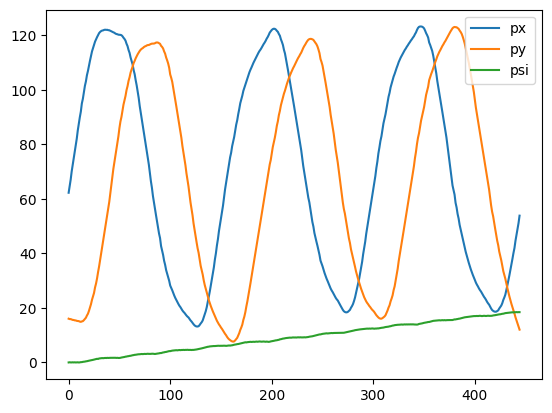

In [24]:
#plot p_x,p_y,psi against time
plt.plot(p_x,label='px')
plt.plot(p_y,label='py')
plt.plot(p_psi,label='psi')
plt.legend()

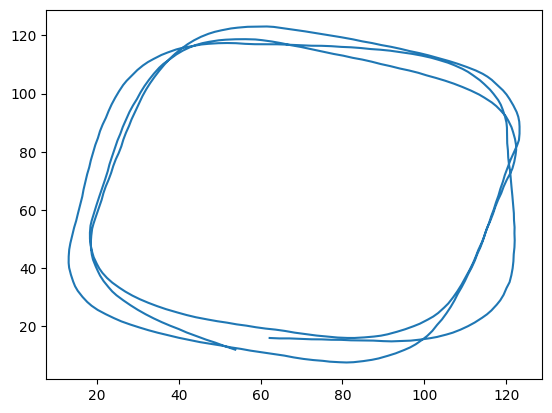

In [25]:
#plot the  x and y position
plt.plot(p_x,p_y)
plt.show()



## Task 7 
### Using Boot strap filter to estimate the position of the robot

In [26]:
#open camera input
dataset1_camere = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/part2_presavedData/dataset1/data/task6-task7/camera_tracking_task6.csv'
df_camera = pd.read_csv(dataset1_camere, names = ['timestamp','barcodeData','c_x','c_y','w','h','perceived_distance','perceived_direction'])
df_camera

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction
0,1.635511e+09,10,-12,99,104,106,58.490566,-1.275083
1,1.635511e+09,11,95,98,107,105,59.047619,9.993482
2,1.635511e+09,12,204,99,112,106,58.490566,20.725996
3,1.635511e+09,10,-12,99,104,106,58.490566,-1.275083
4,1.635511e+09,12,204,99,112,106,58.490566,20.725996
...,...,...,...,...,...,...,...,...
2266,1.635512e+09,10,8,101,131,131,47.328244,0.850133
2267,1.635512e+09,11,143,101,138,133,46.616541,14.855179
2268,1.635512e+09,10,8,101,131,131,47.328244,0.850133
2269,1.635512e+09,10,8,102,131,132,46.969697,0.850133


In [27]:
#merge with qrcode data
df_camera = df_camera.merge(qr, on='barcodeData', how='left')
df_camera

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction,s_x,s_y,pos
0,1.635511e+09,10,-12,99,104,106,58.490566,-1.275083,121.5,12.0,3
1,1.635511e+09,11,95,98,107,105,59.047619,9.993482,121.5,24.2,3
2,1.635511e+09,12,204,99,112,106,58.490566,20.725996,121.5,36.0,3
3,1.635511e+09,10,-12,99,104,106,58.490566,-1.275083,121.5,12.0,3
4,1.635511e+09,12,204,99,112,106,58.490566,20.725996,121.5,36.0,3
...,...,...,...,...,...,...,...,...,...,...,...
2266,1.635512e+09,10,8,101,131,131,47.328244,0.850133,121.5,12.0,3
2267,1.635512e+09,11,143,101,138,133,46.616541,14.855179,121.5,24.2,3
2268,1.635512e+09,10,8,101,131,131,47.328244,0.850133,121.5,12.0,3
2269,1.635512e+09,10,8,102,131,132,46.969697,0.850133,121.5,12.0,3


### Correct the Distance and Angle using focal length

In [28]:
# fix the distance measurement
QR_width = 11.5
df['perceived_distance'] = (QR_width * FOCAL_LENGTH) / df['h']
df['perceived_direction'] = np.arctan2(df['c_x'], FOCAL_LENGTH) * 180 / np.pi

In [29]:
#merge the camera and imu data
df_camera_imu_motor = pd.merge_asof(df_imu_motor,df_camera, on='timestamp', direction='backward')  #TODO Check if this is correct
df_camera_imu_motor

,timestamp,input_1,input2,velocity,acc_x,acc_y,acc_z,roll,pitch,gyro_x,...,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction,s_x,s_y,pos
0,1.635511e+09,0.30,0.144,4.44,-0.004758,-0.021594,1.034804,-0.140766,-0.530752,1.180008,...,11,130,98,114,109,56.880734,13.556883,121.5,24.2,3
1,1.635511e+09,0.18,0.300,4.80,0.002318,-0.015494,1.027484,0.777240,-0.416198,-0.114992,...,12,240,99,121,112,55.357143,23.996777,121.5,36.0,3
2,1.635511e+09,0.30,0.180,4.80,0.001098,-0.033672,1.022360,-0.831317,-1.449163,-0.919992,...,12,252,100,128,118,52.542373,25.052297,121.5,36.0,3
3,1.635511e+09,0.30,0.300,6.00,-0.007198,-0.027572,1.046516,-0.508571,0.120432,-0.744992,...,11,147,100,127,121,51.239669,15.251600,121.5,24.2,3
4,1.635511e+09,0.18,0.300,4.80,-0.005978,-0.008174,1.014308,0.592966,-0.494364,0.235008,...,10,21,100,124,126,49.206349,2.230635,121.5,12.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1.635512e+09,0.30,0.300,6.00,0.015006,-0.015250,1.037244,0.185569,-1.142834,-0.289992,...,12,259,98,121,110,56.363636,25.659780,121.5,36.0,3
441,1.635512e+09,0.18,0.300,4.80,0.005246,-0.008052,1.022604,0.603559,-0.752422,0.200008,...,11,147,99,118,114,54.385965,15.251600,121.5,24.2,3
442,1.635512e+09,0.30,0.180,4.80,0.025132,-0.047946,1.001864,-1.684839,-1.242306,-2.319993,...,11,134,100,121,116,53.448276,13.957938,121.5,24.2,3
443,1.635512e+09,0.18,0.300,4.80,0.002440,-0.014030,1.007598,0.271353,-0.423854,-0.219993,...,11,155,101,127,122,50.819672,16.039943,121.5,24.2,3


In [30]:
#initialise the distribution
#initialise the mean
mu = np.array([INITIAL_X,INITIAL_Y,INITIAL_PSI])
#initialise the covariance
sigma = np.eye(3)

#initialise the lists
muList = []
sigmaList = []
#weights
weights = np.ones(1000) / 1000

def initialiseParticleDistribution(Number_of_particles,mu,sigma):

  #initialise the particles
  particles = np.random.multivariate_normal(mu, sigma, Number_of_particles)
  return particles
particles = initialiseParticleDistribution(1000,mu,sigma)
#iterate over all timestamps

def propagateParticle(particle,dt,velocity,gyro_z):
  #calculate the change in time
  # if index == 0:
  #   dt = INITIIAL_DT  # set a default value for the first timestep
  # else:
  #   dt = row['timestamp'] - df_imu_motor.iloc[index-1]['timestamp']
  #calculate the change in position
  dp_x = velocity * np.cos(particle[2]) * dt
  dp_y = velocity * np.sin(particle[2]) * dt
  # print(dp_x,dp_y)
  # print(px,py,psi)
  dpsi = np.deg2rad(gyro_z) * dt

  #calculate the new position
  px = particle[0] + dp_x
  py = particle[1] + dp_y
  psi = particle[2] + dpsi
  #append to list
  return np.array([px,py,psi])

def computeLikelyhood(particle,s_x,s_y,dist,phi,phi_sigma,dist_sigma):
  #predict the distance and angle from the particle
  d_pred,phi_pred = getFunction(s_x,s_y,particle[0],particle[1],particle[2])
  #calculate the likelyhood
  likelyhoodDist = np.exp(-0.5 * ((dist - d_pred)**2 / dist_sigma**2))
  likelyhoodPhi = np.exp(-0.5 * ((phi - phi_pred)**2 / phi_sigma**2))
  #check for 0 values
  if likelyhoodDist == 0 or likelyhoodPhi == 0:
    likelyhoodDist = 0.0001
    likelyhoodPhi = 0.0001
  if likelyhoodDist * likelyhoodPhi == 0:
    likelyhoodDist = 0.0001
    likelyhoodPhi = 0.0001
    # raise ValueError("Probabilities contain NaN values")
  #return the likelyhood
  return likelyhoodDist * likelyhoodPhi

def resample_particles(particles, weights):
    if np.isnan(weights).any():
      raise ValueError("Probabilities contain NaN values")
    indices = np.random.choice(len(particles), size=len(particles), replace=True, p=weights)
    resampled_particles = [particles[i] for i in indices]
    return resampled_particles

for index,row in df_camera_imu_motor.iterrows():
  for i,particle in enumerate(particles):
    prediciton = propagateParticle(particle,dt,row['velocity'],row['gyro_z'])
    #calculate the likelyhood
    likelyhood = computeLikelyhood(prediciton,row['s_x'],row['s_y'],row['perceived_distance'],row['perceived_direction'],1,1)
    #update the weights
    # print(likelyhood)
    weights[i] = weights[i] * likelyhood
  #normalise the weights
  weights = weights / np.sum(weights)  
  #resample the particles
  particles = resample_particles(particles,weights)
  #update the weighted mean
  mu = np.average(particles, weights=weights, axis=0)
  #update the weighted covariance
  # sigma = np.cov(particles.T, aweights=weights)
  #append to list
  muList.append(mu)
  # sigmaList.append(sigma)  


In [31]:
print(muList)

[array([62.32435873, 14.85799852, -2.75510928]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.08673572]), array([61.911445  , 16.40220673, -3.086

In [32]:
#plot the x and y position
p_x = [arr[0] for arr in muList]
p_y = [arr[1] for arr in muList]

In [33]:
muList

[array([62.32435873, 14.85799852, -2.75510928]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  , 16.40220673, -3.08673572]),
 array([61.911445  ,

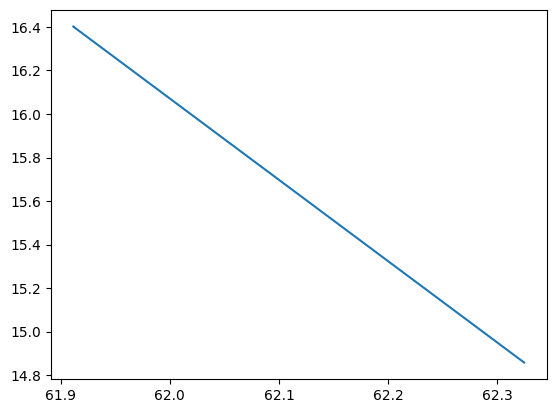

In [34]:
plt.plot(p_x,p_y)
plt.show()